In [1]:
import sys

sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt

from cpsl_datasets.cpsl_ds import CpslDS
from cpsl_datasets.plotters.cpsl_plotter import CpslPlotter
from dotenv import load_dotenv
import os

load_dotenv()
DATASET_PATH=os.getenv("CPSL_DATASET_DIRECTORY")


/home/david/.cache/pypoetry/virtualenvs/cpsl-datasets-3RqKbDu9-py3.12/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#initialize the dataset
dataset = CpslDS(
    dataset_path=DATASET_PATH,
    radar_folder="radar_combined", #"radar_0","radar_1","radar_combined"
    lidar_folder="lidar",
    camera_folder="camera",
    imu_orientation_folder="imu_data",
    imu_full_folder="imu_data_full",
    vehicle_vel_folder="vehicle_vel"
)

#initialize a simple plotter
plotter = CpslPlotter(
    dataset=dataset
)

sample_idx = 0

found 1640 radar samples
found 1640 lidar samples
found 1640 camera samples
found 1640 imu (orientation only) samples
found 1640imu (full data) samples
found 1640 vehicle velocity samples
did not find vehicle odometry samples


loaded radar point cloud with shape: (51, 4)


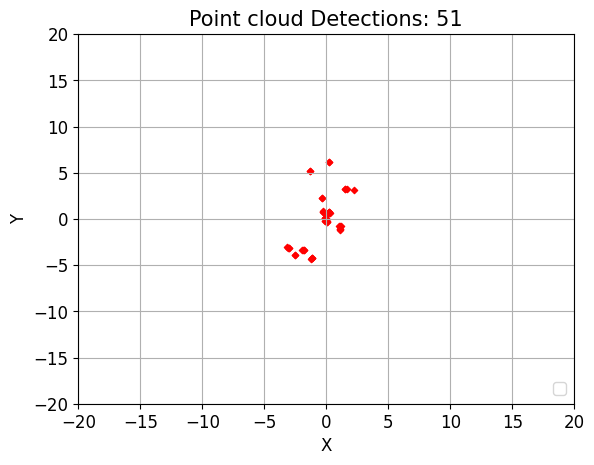

In [3]:
#get radar data #x,y,z,vel values for radar point cloud
#NOTE: Radar data is in FLU (x - forward, y - left, z - up)
radar_data = dataset.get_radar_data(idx=sample_idx)
print(f"loaded radar point cloud with shape: {radar_data.shape}")

plotter.plot_radar_detections(sample_idx=sample_idx,show=True)

loaded raw lidar point cloud with shape: (24230, 6)
loaded 2d lidar point cloud with shape: (7211, 2)


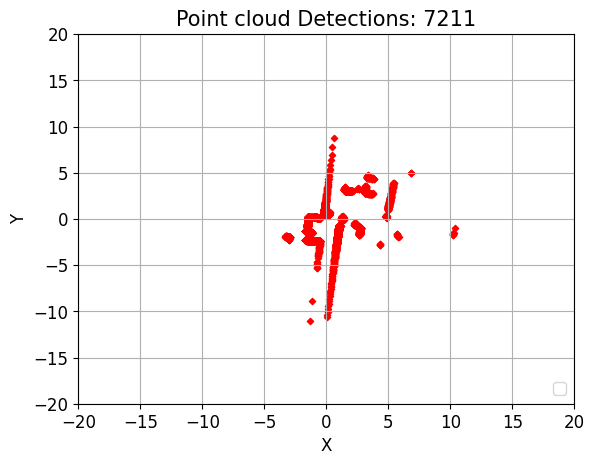

In [4]:
#get the raw lidar point cloud (x,y,z) also in FLU coordinates
lidar_data_raw = dataset.get_lidar_point_cloud_raw(idx=sample_idx)
print(f"loaded raw lidar point cloud with shape: {lidar_data_raw.shape}")


#get a 2D slice of the lidar data (x,y) directly out from the lidar in FLU coodinate frame
lidar_data_2d = dataset.get_lidar_point_cloud(idx=sample_idx)
print(f"loaded 2d lidar point cloud with shape: {lidar_data_2d.shape}")

plotter.plot_2d_lidar_detections_velodyne(sample_idx=sample_idx,show=True)

loaded camera image with shape: (480, 640, 3)


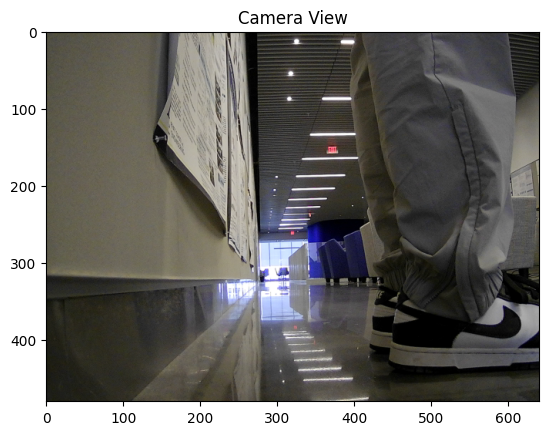

In [5]:
#get the camera data
camera_data = dataset.get_camera_frame(idx=sample_idx)
print(f"loaded camera image with shape: {camera_data.shape}")

plotter.plot_camera_data(
    sample_idx=sample_idx,
    show=True
)

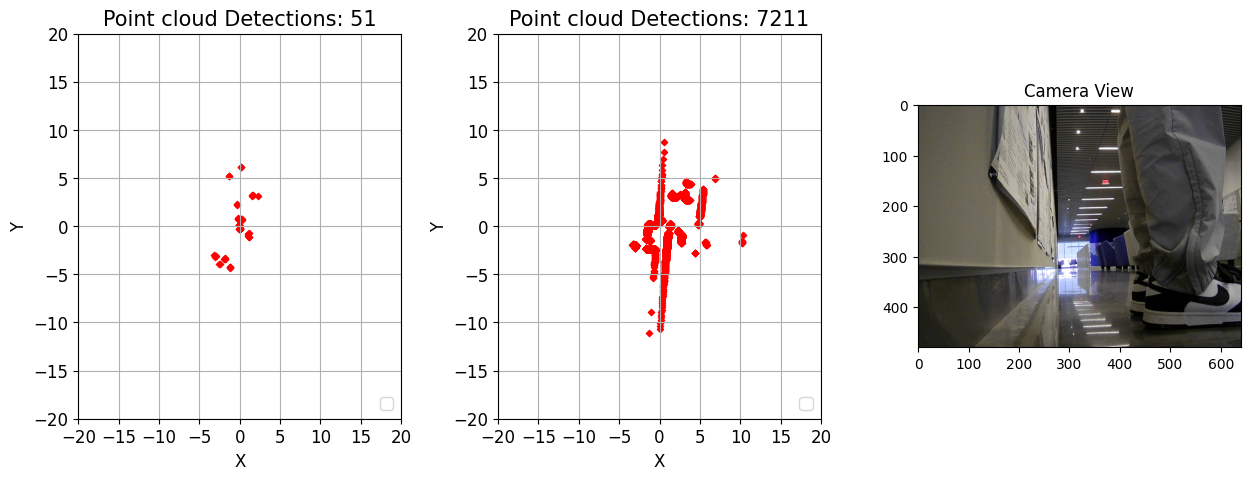

In [6]:
#plot a compilation
plotter.plot_compilation(idx=sample_idx,show=True)